# TP 2

## Tarea 1

In [27]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

import numpy as np
import pandas as pd
import community
from community import community_louvain

import networkx as nx

from glob import glob
from pathlib import Path



import matplotlib.pyplot as plt
import networkx as nx

import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
NUMBER_OF_NODES = 116
MAX_LINKS = NUMBER_OF_NODES*NUMBER_OF_NODES-NUMBER_OF_NODES

In [3]:
def get_avg_graph_from_file(a_file, labels):
    identity_matrix = np.diag(np.ones(NUMBER_OF_NODES))
    df = pd.read_csv(a_file, header=None)
    df -= identity_matrix
    
    if labels != None:
        df.columns = labels
        df.index = labels
    return df

In [4]:
def generate_heatmap(adjacency_matrix, file_name, save_file=True):
  sns.heatmap(adjacency_matrix);
  dimension = adjacency_matrix.shape[0]
  plt.xlim(0,dimension)
  plt.ylim(0,dimension);
  
  if save_file == True:
    plt.savefig(file_name)

In [32]:
def draw_circular_graph(graph, file_name, save_file=True):
  pos = graphviz_layout(graph, prog='twopi', args='')
  plt.figure(figsize=(8, 8))
  nx.draw(graph, pos, node_size=20, alpha=0.5, width=0.1, node_color="blue", with_labels=True)
  plt.axis('equal')

  if save_file == True:
    plt.savefig(file_name)

In [6]:
def plot_graph_by_meassure(densities, graphs, function_to_apply,
                           y_label, x_label, location='lower right',
                           file_name='./to_delete.png', save_to_file=True):
  for name, a_graph in graphs.items():
    # ordenamiento de los pesos
    adjacency_matrix = pd.DataFrame(nx.to_numpy_matrix(a_graph))
    sort_corrs = sorted(adjacency_matrix.values.flatten(),reverse=True)
    messure_to_plot = []
    for a_density in densities:
        # tomo el el peso ubicado en la posicion de fixed_number_of_edges
        fixed_number_of_edges = int(a_density * MAX_LINKS)
        treshold = sort_corrs[fixed_number_of_edges]
        # de esta manera me estoy quedando con aquellas
        # aristas que tengan peso >= u, como maximo el grafo
        # tendra fixed_number_of_edges de aristas
        graph = nx.from_pandas_adjacency(adjacency_matrix >= treshold)
        messure_to_plot.append(function_to_apply(graph))

    plt.plot(densities,messure_to_plot,'.-', label=name)
  
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(loc=location)
  #plt.title("Title", fontsize=16, fontweight='bold')
  #plt.suptitle("Suptitle", fontsize=10)
  if save_to_file == True:
    plt.savefig(file_name)

In [7]:
data_dictionary = pd.read_csv('aal_extended.csv', header=None)

labels = data_dictionary[1].tolist()

In [8]:
avg_n1 = get_avg_graph_from_file(a_file='promedio/N1promedio.csv', labels=labels)

In [9]:
avg_n2 = get_avg_graph_from_file(a_file='promedio/N2promedio.csv', labels=labels)

In [10]:
avg_n3 = get_avg_graph_from_file(a_file='promedio/N3promedio.csv', labels=labels)

In [11]:
avg_w = get_avg_graph_from_file(a_file='promedio/Wpromedio.csv', labels=labels)

In [12]:
graph_for_avg_n1 = nx.from_pandas_adjacency(avg_n1)
graph_for_avg_n2 = nx.from_pandas_adjacency(avg_n2)
graph_for_avg_n3 = nx.from_pandas_adjacency(avg_n3)
graph_for_avg_w = nx.from_pandas_adjacency(avg_w)

weight_graphs = {}
weight_graphs['n1'] = graph_for_avg_n1
weight_graphs['n2'] = graph_for_avg_n2
weight_graphs['n3'] = graph_for_avg_n3
weight_graphs['w'] = graph_for_avg_w

densities = np.linspace(0.01, 1.0, 40)
sleep_states = ['n1', 'n2', 'n3', 'w']

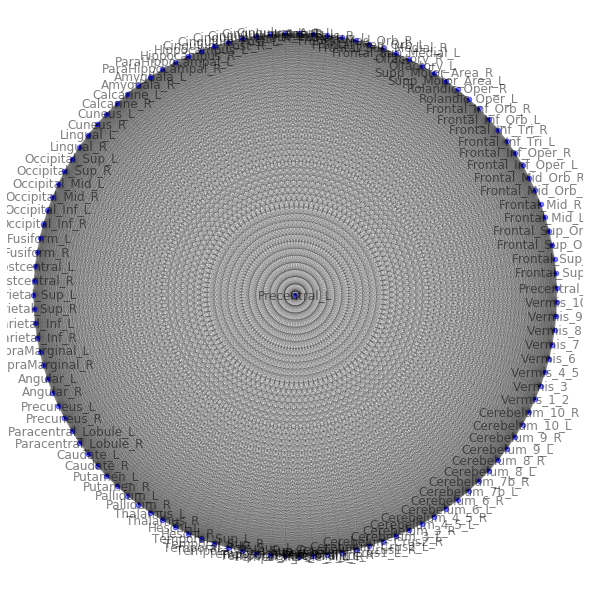

In [33]:
draw_circular_graph(graph=graph_for_avg_n1, file_name='imagenes/avg_n1.png', save_file=True)

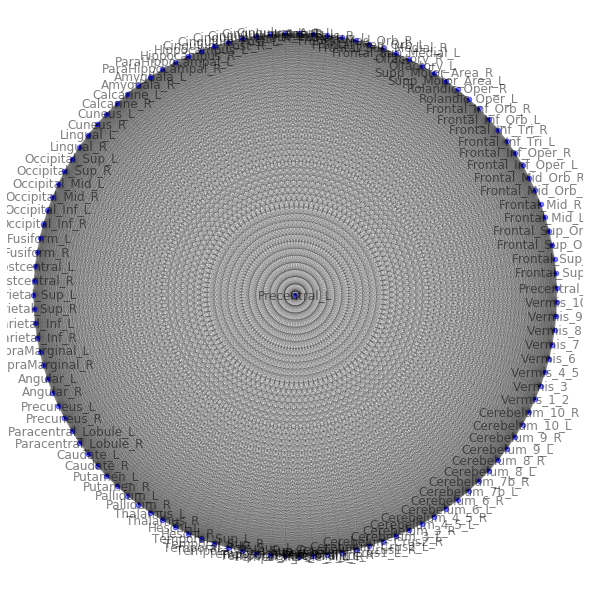

In [34]:
draw_circular_graph(graph=graph_for_avg_n2, file_name='imagenes/avg_n2.png', save_file=True)

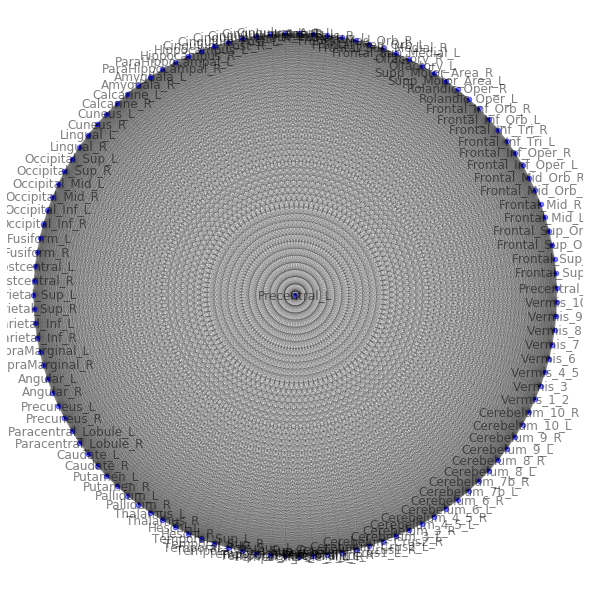

In [35]:
draw_circular_graph(graph=graph_for_avg_n3, file_name='imagenes/avg_n3.png', save_file=True)

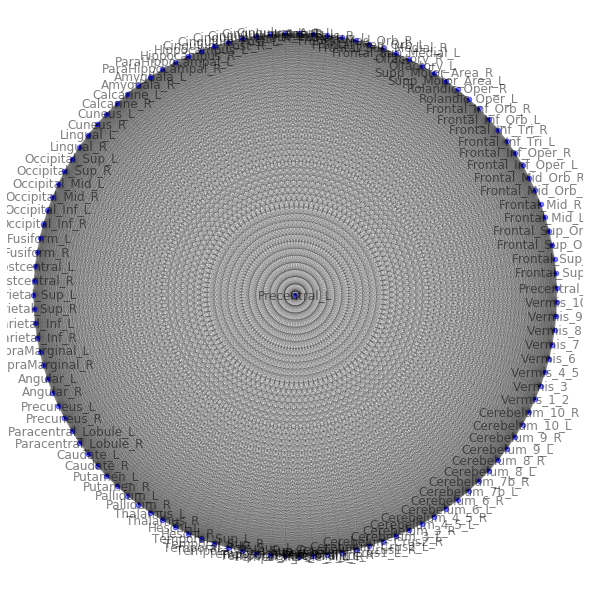

In [36]:
draw_circular_graph(graph=graph_for_avg_w, file_name='imagenes/avg_w.png', save_file=True)

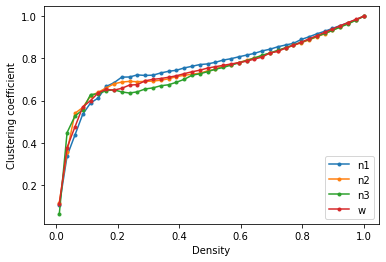

In [18]:
plot_graph_by_meassure(densities, weight_graphs, nx.average_clustering,
                       'Clustering coefficient', 'Density',
                       file_name='imagenes/clust_coeff.png', save_to_file=True)

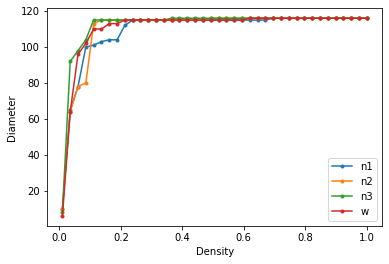

In [19]:
plot_graph_by_meassure(densities, weight_graphs,
                       lambda x: len(sorted(nx.connected_components(x), key = len, reverse=True)[0]),
                       'Diameter', 'Density',
                       file_name='imagenes/diameter.png', save_to_file=True)

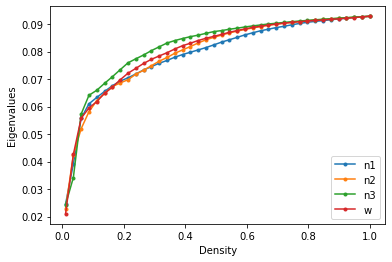

In [20]:
plot_graph_by_meassure(densities, weight_graphs,
                       lambda x: np.mean([v for k,v in nx.eigenvector_centrality_numpy(x).items()]),
                       'Eigenvalues', 'Density',
                       file_name='imagenes/eigenvector.png', save_to_file=True)

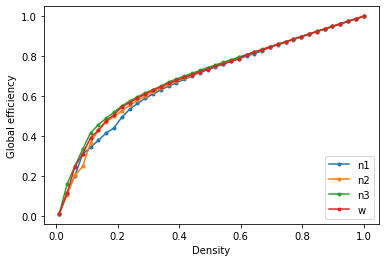

In [21]:
plot_graph_by_meassure(densities, weight_graphs, nx.global_efficiency,
                       'Global efficiency', 'Density',
                       file_name='imagenes/efficiency.png', save_to_file=True)

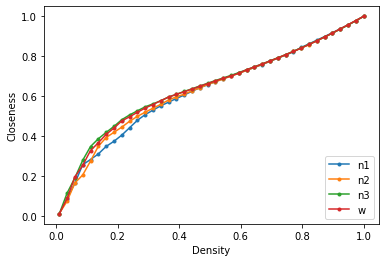

In [22]:
plot_graph_by_meassure(densities, weight_graphs,
                       lambda x: np.mean([v for k,v in nx.closeness_centrality(x).items()]),
                       'Closeness', 'Density',
                       file_name='imagenes/closeness.png', save_to_file=True)

In [23]:
new_densities = [0.01, 0.04, 0.1, 0.3]

In [24]:
graphs = weight_graphs
unweight_graphs = {}
for name, a_graph in graphs.items():
  adjacency_matrix = pd.DataFrame(nx.to_numpy_matrix(a_graph))
  #if labels != None:
  #  adjacency_matrix.columns = labels
  #  adjacency_matrix.index = labels
  sort_corrs = sorted(adjacency_matrix.values.flatten(),reverse=True)
  unweight_graphs[name] = {}
  for a_density in new_densities:
    fixed_number_of_edges = int(a_density * MAX_LINKS)
    # tomo el el peso ubicado en la posicion de fixed_number_of_edges
    u = sort_corrs[fixed_number_of_edges]
    # de esta manera me estoy quedando con aquellas
    # aristas que tengan peso >= u, como maximo el grafo
    # tendra fixed_number_of_edges de aristas
    graph = nx.from_pandas_adjacency(adjacency_matrix >= u)
    unweight_graphs[name][a_density] = graph

In [55]:
def draw_random_geometric_graph(graph, file_name, save_file):
  pos = nx.nx_agraph.graphviz_layout(graph)

  # find node near center (0.5,0.5)
  dmin = 1
  ncenter = 0
  for n in pos:
      x, y = pos[n]
      d = (x - 0.5)**2 + (y - 0.5)**2
      if d < dmin:
          ncenter = n
          dmin = d

  # color by path length from node near center
  p = dict(nx.single_source_shortest_path_length(graph, ncenter))

  nx.draw_networkx_edges(graph, pos, nodelist=[ncenter], alpha=0.4)
  nx.draw_networkx_nodes(graph, pos, nodelist=list(p.keys()),
                         node_size=80,
                         node_color=list(p.values()),
                         cmap=plt.cm.Reds_r)

  #plt.xlim(-0.05, 1.05)
  #plt.ylim(-0.05, 1.05)
  plt.axis('off')

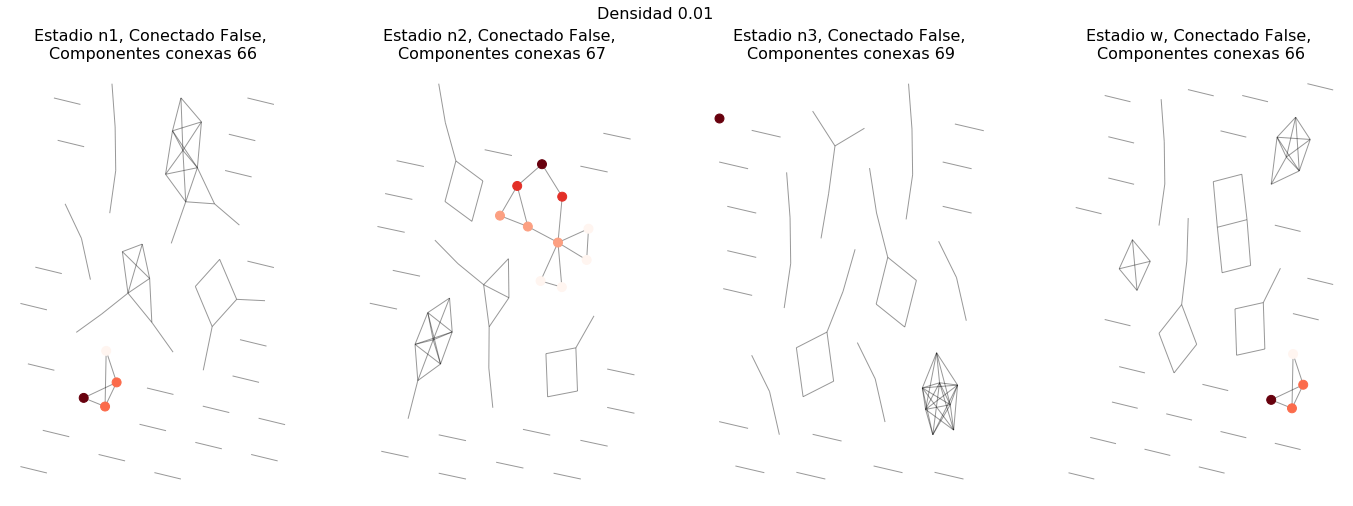

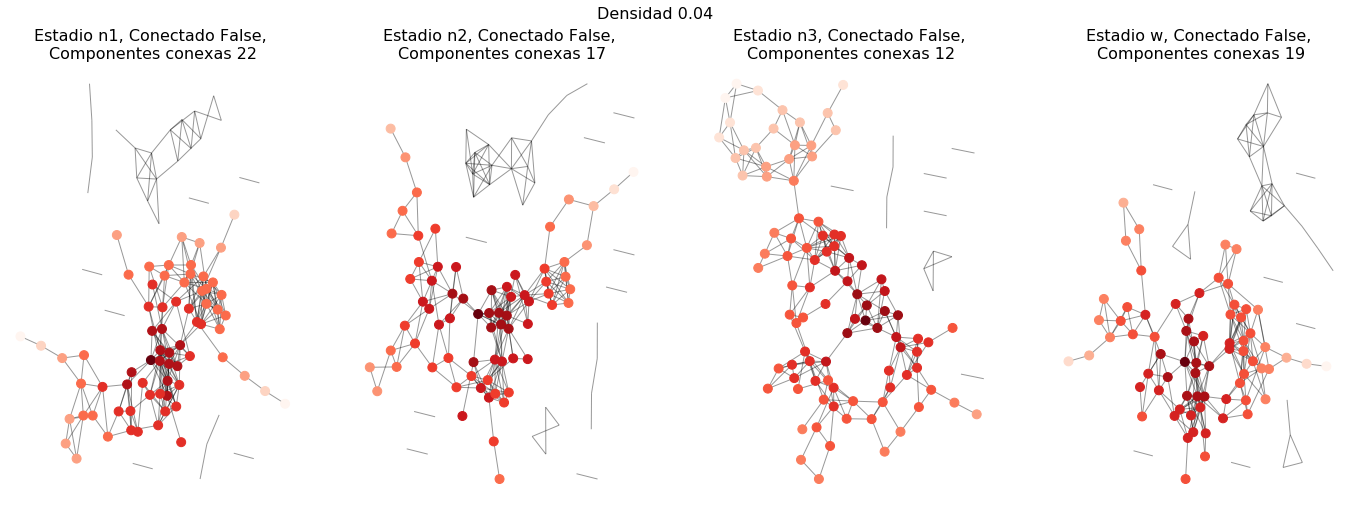

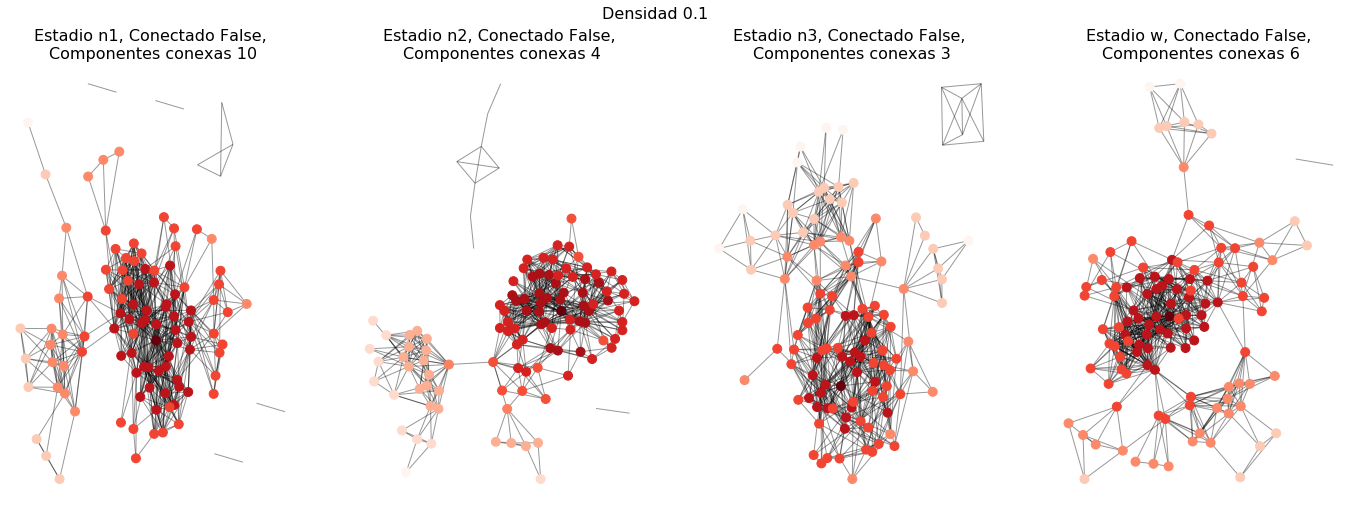

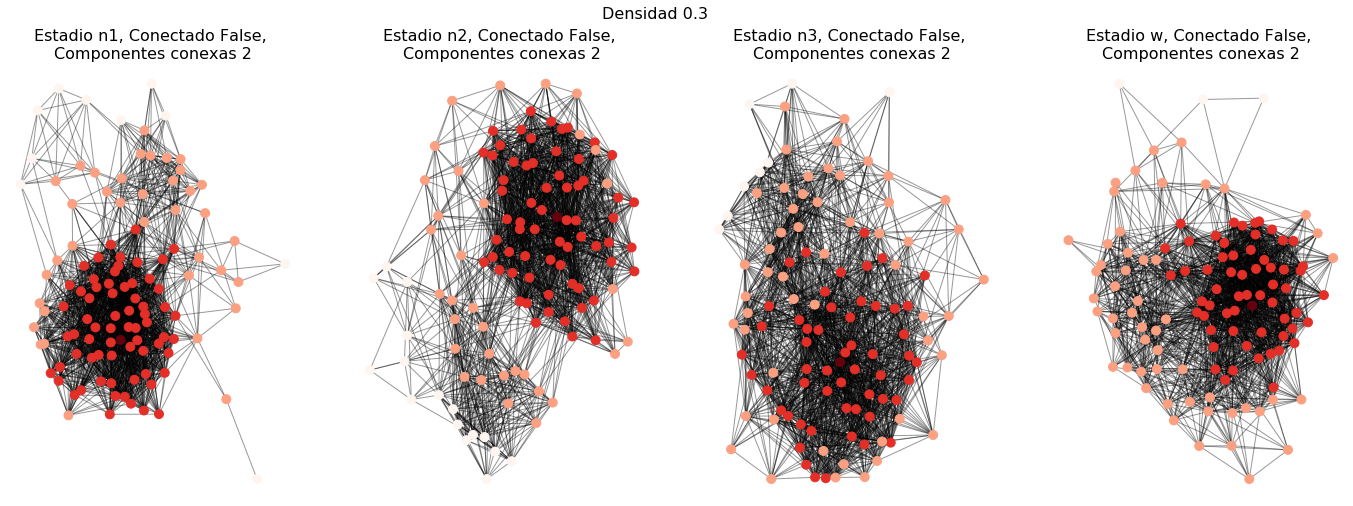

In [56]:
def plot_unweight_graphs(graphs, density, file_name, save_file=True):
  fig = plt.figure(figsize=(24,8))
  fig.suptitle(('Densidad %s' % (density)), fontsize=16)
  for index, name in enumerate(graphs):
    a_graph = unweight_graphs[name][density]
    plt.subplot(141 + index)
    title = 'Estadio %s, Conectado %s, \nComponentes conexas %s' % (name, nx.is_connected(a_graph), nx.number_connected_components(a_graph))
    plt.title(title, fontsize=16)
    draw_random_geometric_graph(a_graph, file_name, False)
  
  if save_file == True:
      plt.savefig(file_name)

for a_density in new_densities:
  the_file_name = 'imagenes/unweight_graphs_' + str(a_density).replace(".","") + '.png'
  plot_unweight_graphs(graphs=unweight_graphs, density=a_density, file_name=the_file_name, save_file=True)

## Tarea 2

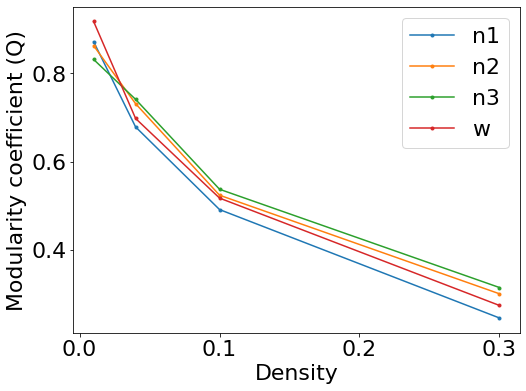

In [73]:
def calculate_modularity_coefficient(graph):
    modulos = community_louvain.best_partition(graph)
    return community_louvain.modularity(modulos, graph)
  
plot_graph_by_meassure(new_densities, weight_graphs,
                       calculate_modularity_coefficient,
                       'Modularity coefficient (Q)', 'Density', location='upper right',
                       file_name='imagenes/mod_coeff.png', save_to_file=True)

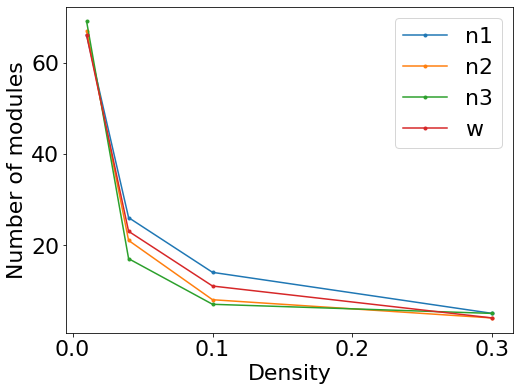

In [74]:
def calculate_number_of_modules(graph):
    modulos = community_louvain.best_partition(graph)
    return len(set(modulos.values()))
  
plot_graph_by_meassure(new_densities, weight_graphs,
                       calculate_number_of_modules,
                       'Number of modules', 'Density', location='upper right',
                       file_name='imagenes/number_mod.png', save_to_file=True)

In [70]:
graphs = unweight_graphs
random_graphs = {}
for name, graphs_by_density in graphs.items():
  random_graphs[name] = {}
  for a_density, a_graph in graphs_by_density.items():
    graph = nx.expected_degree_graph([v for k,v in a_graph.degree()])
    random_graphs[name][a_density] = graph

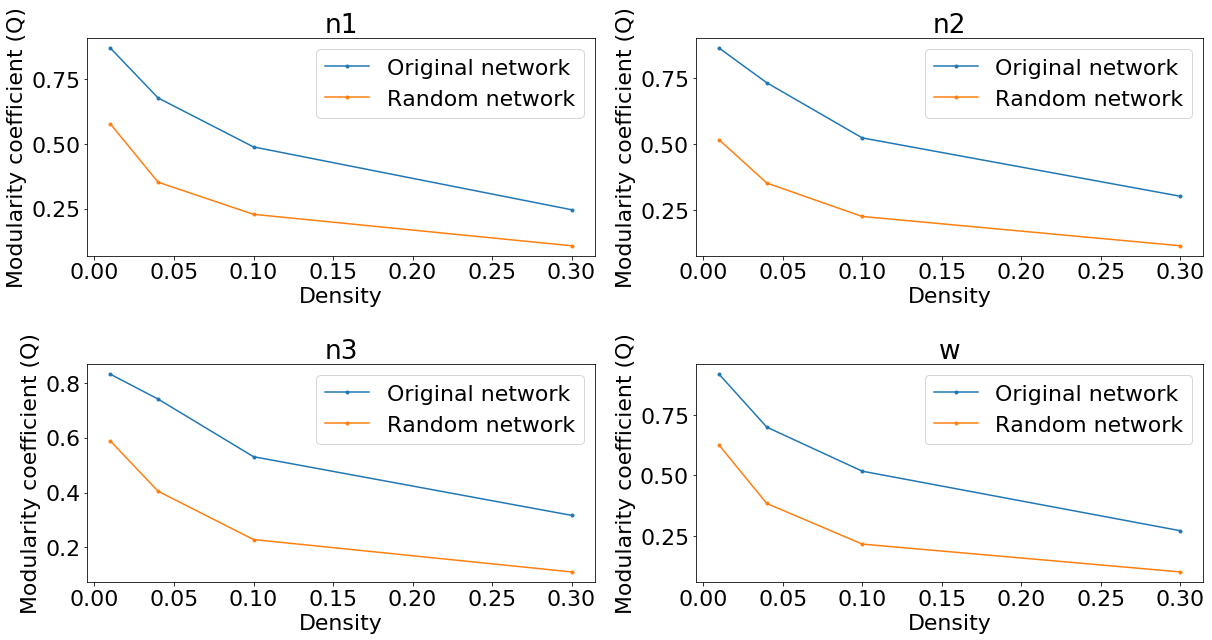

In [112]:
fig = plt.figure(figsize=(20,10))
fig.tight_layout()
for index, name in enumerate(unweight_graphs):
  orignal_values = [calculate_modularity_coefficient(one_graph) for one_graph in unweight_graphs[name].values()]
  random_values = [calculate_modularity_coefficient(one_graph) for one_graph in random_graphs[name].values()]
  
  plt.subplot(2, 2, index + 1)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
  plt.plot(new_densities, orignal_values,'.-', label='Original network')
  plt.plot(new_densities, random_values,'.-', label='Random network')

  plt.xlabel('Density')
  plt.ylabel('Modularity coefficient (Q)')
  plt.legend(loc='upper right')
  plt.title(name)
plt.savefig('imagenes/mod_coeff_vs_random.png')

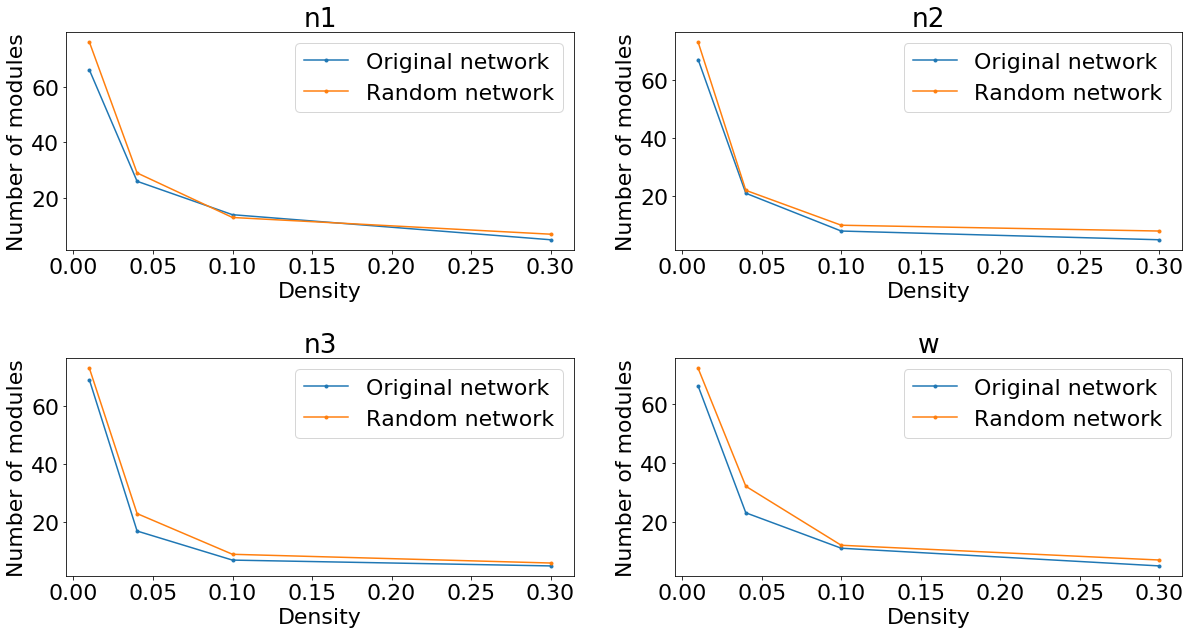

In [111]:
fig = plt.figure(figsize=(20,10))
fig.tight_layout()
for index, name in enumerate(unweight_graphs):
  orignal_values = [calculate_number_of_modules(one_graph) for one_graph in unweight_graphs[name].values()]
  random_values = [calculate_number_of_modules(one_graph) for one_graph in random_graphs[name].values()]
  
  plt.subplot(2, 2, index + 1)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
  plt.plot(new_densities, orignal_values,'.-', label='Original network')
  plt.plot(new_densities, random_values,'.-', label='Random network')

  plt.xlabel('Density')
  plt.ylabel('Number of modules')
  plt.legend(loc='upper right')
  plt.title(name)
plt.savefig('imagenes/number_modules_vs_random.png')